In [14]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
# import cv2
import skimage as sk
from sympy import Ellipse, Point
import random
import time
# import pylandau as pland
# import ROOT
import sys

from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [52]:
### Estilo de las figuras
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# Prueba - Creación de PDFs y añadir texto/imágenes

In [61]:
path_image = 'Perfil_Muon.jpg'
### Crear un nuevo docmento en PDF y agregar primera frase

## Caracteristicas de las hojas con este formato:
    ## Una hoja A4 está constituida por 595.2 puntos de ancho (width) y 841.8 puntos de alto (height).


w, h = A4 ## dimensiones del formato

c = canvas.Canvas("hola-mundo.pdf")     ## Crea el PDF

c.drawString(w/2, 50, "1.a")   ## Añade lineas de texto en la parte inferior izquierda de la hoja del PDF
c.drawString(50, h - 50, "¡Hola, mundo!")   ## Misma linea de texto pero ahora en la parte superior izquierda

c.showPage()    ## Indica que ya terminamos ed trabajr con esta hoja

# c.drawImage(path_image, 50, h - 200)  ## Imagen con las dimensione originales y posición superior izquierda
# c.showPage()

# c.drawImage(path_image, 50, h - 200, width=50, height=50)   ## Imagen con dimensiones diferentes
# c.showPage()

# Ubicar el logo en el extremo superior izquierdo.
# img = ImageReader(path_image)

# # Obtener el ancho y alto de la imagen.
# img_w, img_h = img.getSize()

# # h - img_h es el alto de la hoja menos el alto de la imagen.
# c.drawImage(img, 0, h - img_h)
# c.showPage()

c.save()       ## Guarda el documento

## Formatos de Hojas 

In [5]:
print('Dimensiones del formato A4: ', A4)

print('Dimensiones del formato letter: ', letter)

Dimensiones del formato A4:  (595.2755905511812, 841.8897637795277)
Dimensiones del formato letter:  (612.0, 792.0)


## Charge in ADUs

In [18]:
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_100_Elip_4_ADUs__.pkl'
dict_muons = open(path, 'rb')
dict_muons_true = pck.load(dict_muons)
dict_muons.close()

In [19]:
type(dict_muons_true)
print(dict_muons_true.keys())

print(dict_muons_true['extension_1'].keys())

dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
dict_keys(['charge', 'Vertical_Events', 'Horizontal_Events'])


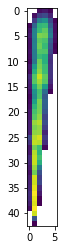

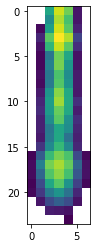

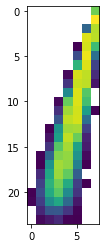

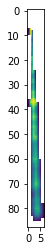

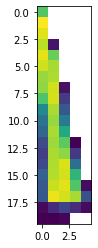

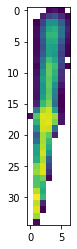

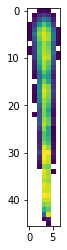

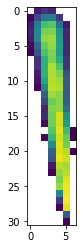

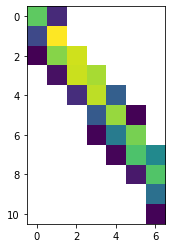

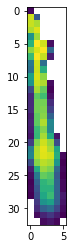

In [20]:
for event in dict_muons_true['extension_1']['Vertical_Events'][0:10]:
    plt.imshow(event)
    plt.show()

65
65
52
26
56
51


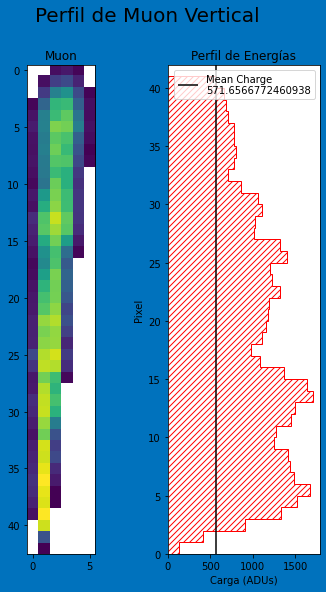

In [80]:
print(len(dict_muons_true['extension_1']['Vertical_Events']))
print(len(dict_muons_true['extension_1']['Horizontal_Events']))

print(len(dict_muons_true['extension_2']['Vertical_Events']))
print(len(dict_muons_true['extension_2']['Horizontal_Events']))

print(len(dict_muons_true['extension_4']['Vertical_Events']))
print(len(dict_muons_true['extension_4']['Horizontal_Events']))


fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in dict_muons_true['extension_1']['Vertical_Events'][0:3]:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

289.53640481900766


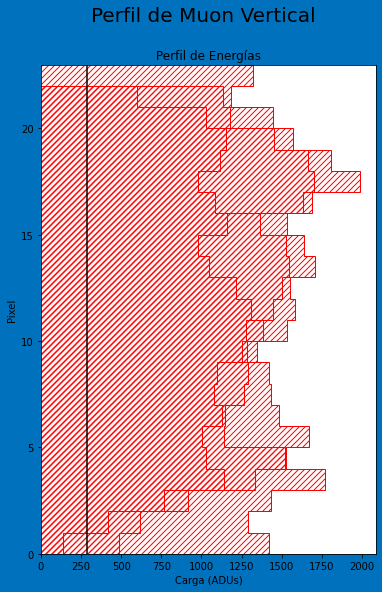

In [75]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

list_mean_charge = []

for event in dict_muons_true['extension_1']['Vertical_Events'][0:3]:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        list_mean_charge.append(mean_charge)
        # print(charge)

    axs.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs.vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs.set_xlabel('Carga (ADUs)')
    axs.set_ylabel('Pixel')
    axs.set_ylim(0,len(event) - 1 )
    axs.set_title('Perfil de Energías')
    # axs.legend()

total_mean_charge = np.mean(list_mean_charge)
print(total_mean_charge)
axs.vlines(x = total_mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
plt.show()

# Charge in eV

In [124]:
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_100_Elip_4_KeV__.pkl'
dict_muons = open(path, 'rb')
dict_muons_true = pck.load(dict_muons)
dict_muons.close()

In [171]:
### Número de muones verticales/horizontales por extensión
print('Número de Muones en la Extensión 1')
print(' Verticales: ', len(dict_muons_true['extension_1']['Vertical_Events']))
print(' Horizontales: ', len(dict_muons_true['extension_1']['Horizontal_Events']), end='\n\n')

print('Número de Muones en la Extensión 2')
print(' Verticales: ', len(dict_muons_true['extension_2']['Vertical_Events']))
print(' Horizontales: ', len(dict_muons_true['extension_2']['Horizontal_Events']), end='\n\n')


print('Número de Muones en la Extensión 4')
print(' Verticales: ', len(dict_muons_true['extension_4']['Vertical_Events']))
print(' Horizontales: ', len(dict_muons_true['extension_4']['Horizontal_Events']), end='\n\n')

Número de Muones en la Extensión 1
 Verticales:  60
 Horizontales:  52

Número de Muones en la Extensión 2
 Verticales:  45
 Horizontales:  16

Número de Muones en la Extensión 4
 Verticales:  45
 Horizontales:  39



Charge:  29018.031
Mean Charge:  239.81844008264463


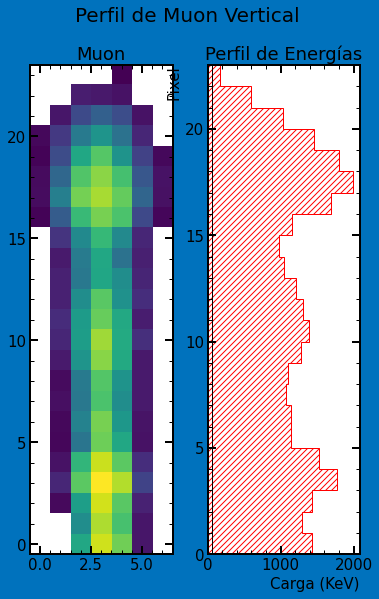

In [141]:
## Perfil energético de un muon
n_muon = 2
fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in dict_muons_true['extension_1']['Vertical_Events'][n_muon - 1:n_muon]:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])
    muon_charge = event.sum()
    muon_mean_charge = event.mean()

    charge_verticalMuon = []
    for lable_line in range(1,nlabels_verticalMuon):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = np.mean(data_mask)

        charge_verticalMuon.append(charge)
        # print(charge)

    print('Charge: ', muon_charge)
    print('Mean Charge: ', muon_mean_charge)
    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k')#, label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (KeV)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    # fig.legend()
    plt.show()

Mean Value: 328.02403301670404 KeV


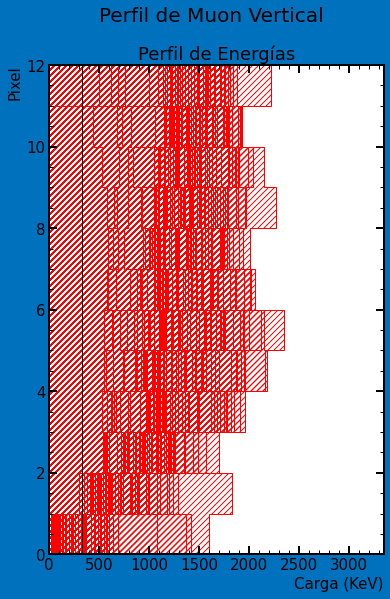

In [127]:
### Valor promedio de varios muones verticales
fig, axs = plt.subplots(ncols=1, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

list_mean_charge = []

for event in dict_muons_true['extension_1']['Vertical_Events']:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        list_mean_charge.append(mean_charge)
        # print(charge)

    axs.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs.vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs.set_xlabel('Carga (KeV)')
    axs.set_ylabel('Pixel')
    axs.set_ylim(0,len(event) - 1 )
    axs.set_title('Perfil de Energías')
    # axs.legend()

total_mean_charge = np.mean(list_mean_charge)
print('Mean Value: '+ str(total_mean_charge) + ' KeV')
axs.vlines(x = total_mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
plt.show()

## Guardar muones en PDF

In [198]:
# c = canvas.Canvas("Muones-Verticales.pdf")
c = canvas.Canvas("Muones-Horizontales.pdf")

# list_n_vertical = []
# list_n_events = []

n_events = 0
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
w, h = A4 ## dimensiones del formato
num_pages = 0
c.showPage()
n_last_events = 0

for extension in (1,2,4):
    c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
    # n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
    n_vertical = len(dict_muons_true['extension_' +str(extension)]['Horizontal_Events'])
    n_last_events = 0
    n_events = 0
    # print(n_vertical % 9 != 0)

    if (n_vertical%9) == 0:
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in dict_muons_true['extension_' +str(extension)]['Horizontal_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

    if (n_vertical%9) != 0:
        
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in dict_muons_true['extension_' +str(extension)]['Horizontal_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            if n_vertical >= 6:
                # print('n_vertical: ', n_vertical)
                if n_events < 10: 
                    # print('n_events: ', n_events)
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                    if n_events == 9:
                        n_events = 10

                if n_events == 10:
                    n_events = 0
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages) + '.a')
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

                    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

            if  n_vertical < 6:
                n_last_events = n_last_events + 1
                # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
                # print('n_vertical: ', n_vertical)
                # print('n_last_events: ', n_last_events)
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)

                if n_vertical == 0:
                    # plt.show()
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages) + '.a')
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg




plt.close()
c.save()